# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [ ]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [34]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [35]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [36]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [37]:
# Create an empty list
mars = []

# Loop through the scraped data to create a list of rows
for row in rows:
    id_num = row.find_all('td')
    ids = []
    for mars_ids in id_num:
        ids.append(mars_ids.text)
    mars.append(ids)
   # terrestrial_date = row[1]
   # sol = row[2]
    #ls = row[3]
   # month = row[4]
    #min_temp = row[5]
   # pressure = row[6]

  



In [38]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_mars_df = pd.DataFrame(mars, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [39]:
# Confirm DataFrame was created successfully
temp_mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [53]:
# Examine data type of each column
print(temp_mars_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [41]:
# Change data types for data analysis


In [42]:
# Confirm type changes were successful by examining data types again


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [58]:
# 1. How many months are there on Mars?
months_on_mars = temp_mars_df['month'].nunique()
martian_months = months_on_mars 
print("Number of months on Mars:", martian_months)


Number of months on Mars: 12


In [57]:
# 2. How many Martian days' worth of data are there?
martian_days = temp_mars_df['sol'].nunique()
print("Number of Martian days in the dataset:", martian_days)

Number of Martian days in the dataset: 1867


In [59]:
# 3. What is the average low temperature by month?
temp_mars_df['min_temp'] = pd.to_numeric(temp_mars_df['min_temp'], errors='coerce')
monthly_avg_low_temp = temp_mars_df.groupby('month')['min_temp'].mean()


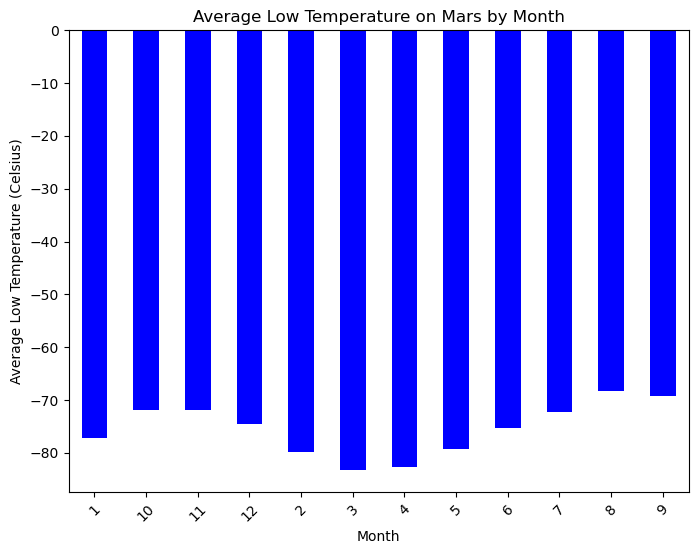

In [60]:
# Plot the average temperature by month
plt.figure(figsize=(8, 6))
monthly_avg_low_temp.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.title('Average Low Temperature on Mars by Month')
plt.xticks(rotation=45)
plt.show()

In [62]:
# Identify the coldest and hottest months in Curiosity's location
monthly_avg_min_temp = temp_mars_df.groupby('month')['min_temp'].mean()
coldest_month = monthly_avg_min_temp.idxmin()
hottest_month = monthly_avg_min_temp.idxmax()
print("Coldest month at Curiosity's location:", coldest_month)
print("Hottest month at Curiosity's location:", hottest_month)

Coldest month at Curiosity's location: 3
Hottest month at Curiosity's location: 8


In [66]:
# 4. Average pressure by Martian month
temp_mars_df['pressure'] = pd.to_numeric(temp_mars_df['pressure'], errors='coerce')
average_pressure_by_month = temp_mars_df.groupby('month')['pressure'].mean()

print("Average pressure by Martian month:")
print(average_pressure_by_month.to_string(index=True, header=False))


Average pressure by Martian month:
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970


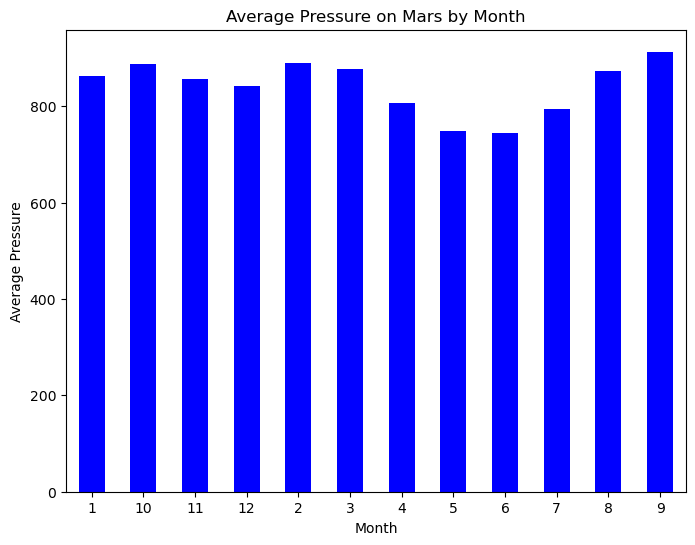

In [67]:
# Plot the average pressure by month
plt.figure(figsize=(8, 6))
average_pressure_by_month.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure on Mars by Month')
plt.xticks(rotation=0)
plt.show()

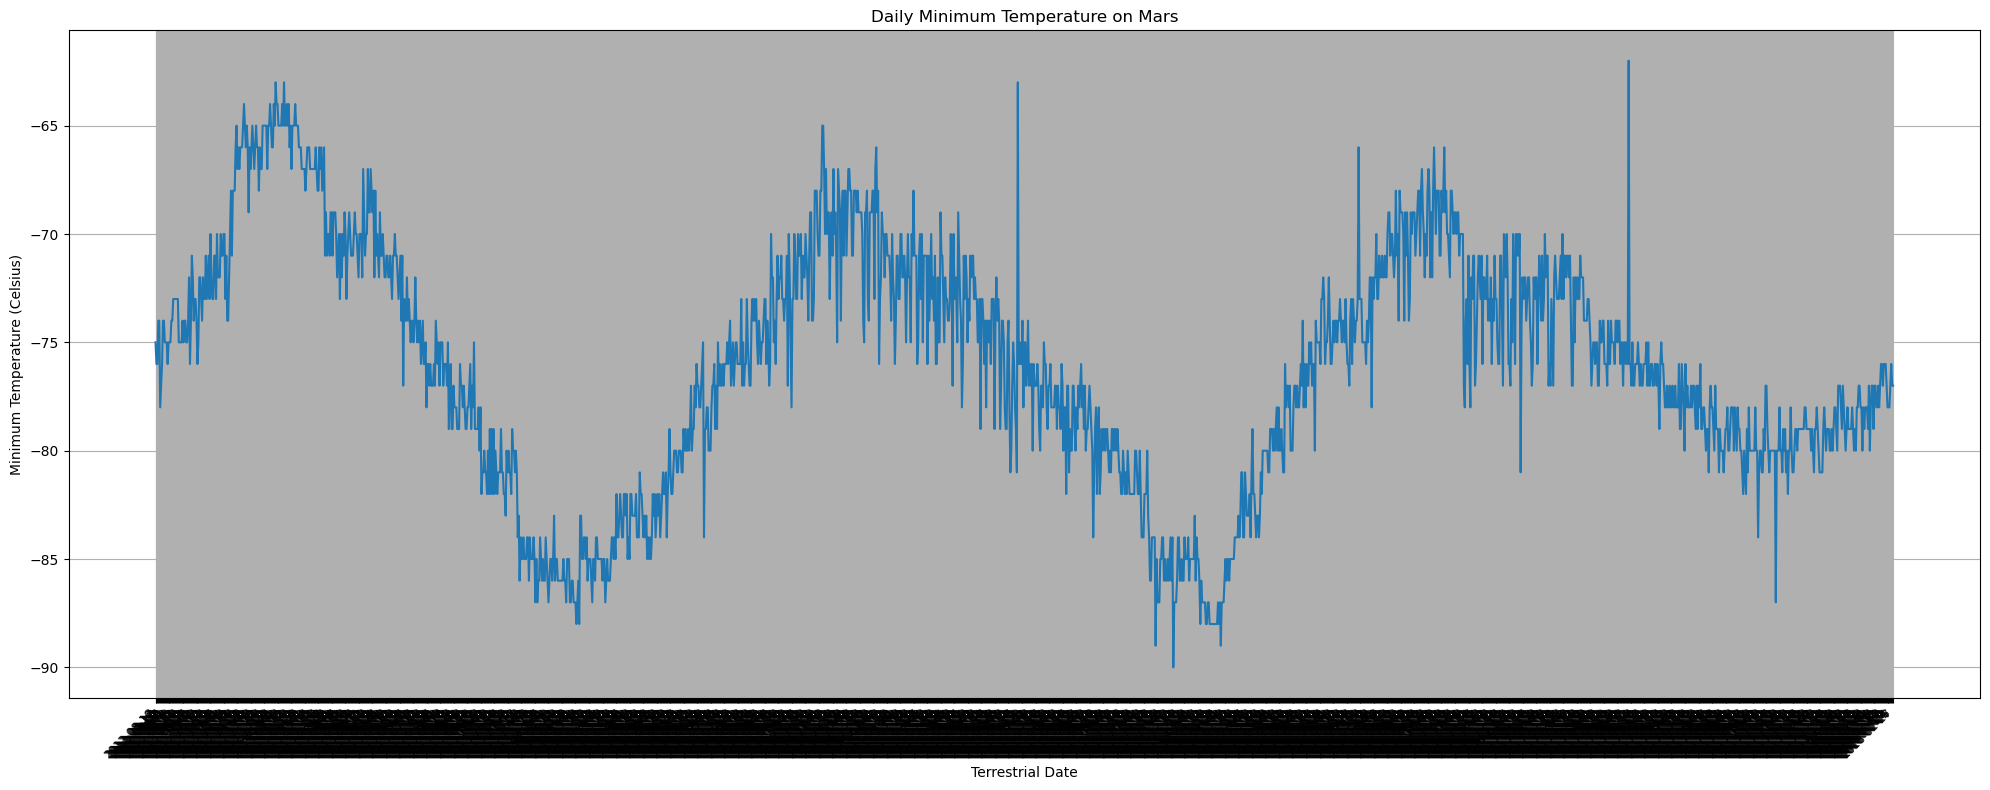

In [99]:
# 5. How many terrestrial (earth) days are there in a Martian year?
fig, ax = plt.subplots(figsize=(20, 8))
plt.figure(figsize=(20, 6))
plt.plot(temp_mars_df['terrestrial_date'], temp_mars_df['min_temp'])
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate, align, and reduce font size
plt.grid(True)
plt.tight_layout()
plt.show()

In [104]:
temp_mars_df['terrestrial_date'] = pd.to_datetime(temp_mars_df['terrestrial_date'])

# Calculate the total number of days
total_days = (temp_mars_df['terrestrial_date'].max() - temp_mars_df['terrestrial_date'].min()).days + 1

# Print the total number of days
print("Total number of days:", total_days)

Total number of days: 2022


Since there are 2022 days total in our dataframe, we can use this to determine how many terrestrial days there are in a Martrian Year. Looking at the above plot there are 3 times when the minimum temperature moves from a maximum to minimum value so we can assume that is the progression of 3 rotations around the sun. To find the terrestrial days in a Martian Year, we can divide total days by the rotations around the sun, so 2022/3 = 674. There are about 674 terrestrial days in a Martian Year.

In [105]:
# Find the lowest minimum temperature
lowest_min_temp = min(temp_mars_df['min_temp'])
lowest_min_temp

-90.0

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [74]:
# Write the data to a CSV
temp_mars_df.to_csv('mars_data.csv', index=False)


In [106]:
browser.quit()